# Question_2: Plot the average delay time per provider (EUROSTAR, NMBS, THALYS).


In [35]:
import glob as glob
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import src.data_processing.data as data

<AxesSubplot: xlabel='Railway operators'>

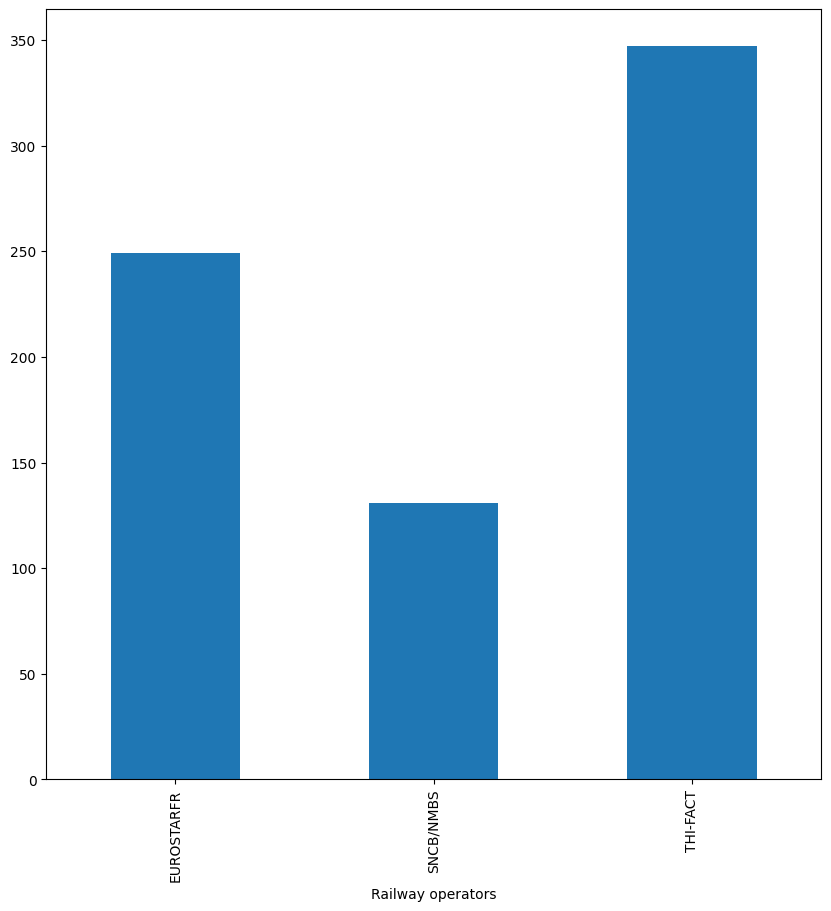

In [9]:
trips = data.full_trips
trips.groupby("Railway operators")["Delay time"].mean().plot(kind="bar", figsize=(10, 10))

In [8]:
trips = data.full_trips
trips.head(5)

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time
0,0,2020-09-22,11,ICE,SNCB/NMBS,36N,2022-10-31 06:31:22,2022-10-31 06:33:27,2022-10-31 06:31:00,2022-10-31 06:33:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,brussel-noord/bruxelles-nord,0/1,2020-09-22 00:00:00,2020-09-22,2020-09-22,2020-09-22,22
1,1,2020-09-22,11,ICE,SNCB/NMBS,36N,2022-10-31 06:36:23,2022-10-31 06:36:23,2022-10-31 06:36:00,2022-10-31 06:36:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,schaarbeek/schaerbeek,36N,2020-09-22 00:00:00,2020-09-22,2020-09-22,2020-09-22,23
2,2,2020-09-22,11,ICE,SNCB/NMBS,36N,2022-10-31 06:37:44,2022-10-31 06:37:44,2022-10-31 06:37:00,2022-10-31 06:37:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,haren-sud/haren-zuid,36N,2020-09-22 00:00:00,2020-09-22,2020-09-22,2020-09-22,44
3,3,2020-09-22,11,ICE,SNCB/NMBS,36N,2022-10-31 06:38:39,2022-10-31 06:38:39,2022-10-31 06:38:00,2022-10-31 06:38:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,diegem,36N,2020-09-22 00:00:00,2020-09-22,2020-09-22,2020-09-22,39
4,4,2020-09-22,11,ICE,SNCB/NMBS,36N,2022-10-31 06:39:47,2022-10-31 06:39:47,2022-10-31 06:40:00,2022-10-31 06:40:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,kortenberg,36N,2020-09-22 00:00:00,2020-09-22,2020-09-22,2020-09-22,0


In [4]:
all_files = glob.glob(r'C:\users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\Trips\*.csv')


IsADirectoryError: [Errno 21] Is a directory: '/Users/maxwang/PycharmProjects/group7-group-assignment-/Data/Unprocessed/Trips'

In [29]:
all_files

['C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_20_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_21_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_22_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_23_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_24_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_25_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_26_9.csv_processed.csv']

In [9]:
df = pd.concat((pd.read_csv(f) for f in all_files))

NameError: name '__file__' is not defined

In [10]:
df.head()

NameError: name 'df' is not defined

In [49]:
df = df[['Train number', 'Railway operators', 'Time of real arrival','Time of planned arrival', 'Name of the stop']]    #filteren op kolommen dat je nodig hebt
df.dropna(subset = ['Time of planned arrival'], inplace = True) #lege values laten vallen, want je kan hier geen delay van berekenen

In [50]:
df.columns

Index(['Train number', 'Railway operators', 'Time of real arrival',
       'Time of planned arrival', 'Name of the stop'],
      dtype='object')

In [53]:
difference = df.sort_values(by=['Train number', 'Time of planned arrival'], ascending = True).groupby('Train number').tail(1)   #je moet sorteren zowel volgens trein nummer & dan op tijd anders staan je routes niet bijeen (volgens wat gepland is! )
# groupby ( per route wil je de vertraging berekenen & tail: de laatste houd je over omdat dit je delay is tov je aankomst)

In [78]:
difference.head(5)

,Train number,Railway operators,Time of real arrival,Time of planned arrival,Name of the stop,Delta
768,10,SNCB/NMBS,1900-01-01 21:33:24,1900-01-01 21:35:00,BRUSSEL-ZUID,0.0
164,11,SNCB/NMBS,1900-01-01 07:38:56,1900-01-01 07:30:00,HERGENRATH,536.0
36329,12,SNCB/NMBS,1900-01-01 20:09:27,1900-01-01 19:35:00,BRUSSEL-ZUID,2067.0
4566,13,SNCB/NMBS,1900-01-01 09:30:00,1900-01-01 09:30:00,HERGENRATH,0.0
6781,14,SNCB/NMBS,1900-01-01 17:54:22,1900-01-01 17:35:00,BRUSSEL-ZUID,1162.0


In [83]:
difference['Time of real arrival'] = pd.to_datetime(difference['Time of real arrival'], format='%H:%M:%S')      #je format je real arrival into datetime
difference['Time of planned arrival'] = pd.to_datetime(difference['Time of planned arrival'], format='%H:%M:%S')      #je format je planned arrival into datetime
difference['Delta'] = difference.apply(lambda x: (x['Time of real arrival']-x['Time of planned arrival']).total_seconds(), axis = 1)    #average delay time in seconds

In [84]:
difference['Delta'].head()

768       -96.0
164       536.0
36329    2067.0
4566        0.0
6781     1162.0
Name: Delta, dtype: float64

In [69]:
difference.loc[difference['Delta'] < 0, "Delta"]=0

In [70]:
difference['Delta'].head()

768         0.0
164       536.0
36329    2067.0
4566        0.0
6781     1162.0
Name: Delta, dtype: float64

In [71]:
difference.head()

,Train number,Railway operators,Time of real arrival,Time of planned arrival,Name of the stop,Delta
768,10,SNCB/NMBS,1900-01-01 21:33:24,1900-01-01 21:35:00,BRUSSEL-ZUID,0.0
164,11,SNCB/NMBS,1900-01-01 07:38:56,1900-01-01 07:30:00,HERGENRATH,536.0
36329,12,SNCB/NMBS,1900-01-01 20:09:27,1900-01-01 19:35:00,BRUSSEL-ZUID,2067.0
4566,13,SNCB/NMBS,1900-01-01 09:30:00,1900-01-01 09:30:00,HERGENRATH,0.0
6781,14,SNCB/NMBS,1900-01-01 17:54:22,1900-01-01 17:35:00,BRUSSEL-ZUID,1162.0


In [75]:
differencePerOp = difference.groupby('Railway operators')['Delta'].mean().reset_index(name = 'mean').round(0)
#pak mean van average delay time & reset_index maakt nieuwe kolom aan voor mean

In [76]:
differencePerOp.head()

,Railway operators,mean
0,EUROSTARFR,120.0
1,SNCB/NMBS,143.0
2,THI-FACT,658.0


In [ ]:
def addvaluelabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')


In [1]:
plt.bar(differencePerOp['Railway operators'], differencePerOp['mean'], color='blue')
addvaluelabels(differencePerOp['Railway operators'], differencePerOp['mean'])
plt.title('Average delay time per provider')
plt.xlabel("Provider")
plt.ylabel("Average delay time")
plt.legend(loc="upper left")
plt.xticks(rotation= "vertical")
plt.show()


NameError: name 'plt' is not defined

In [62]:
difference['Time of real arrival'].head()

768     1900-01-01 21:33:24
164     1900-01-01 07:38:56
36329   1900-01-01 20:09:27
4566    1900-01-01 09:30:00
6781    1900-01-01 17:54:22
Name: Time of real arrival, dtype: datetime64[ns]

In [34]:
#vraag5
all_files = glob.glob('C:\Users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\Trips')
df = pd.concat((pd.read_csv(f) for f in all_files))
difference = df.sort_values(by=['Train number', 'Time of planned arrival'], ascend = True, inplace = True).groupby('Train number').tail(1)   #je moet sorteren anders staan je routes niet bijeen (volgens wat gepland is! )
difference['Time of real arrival'] = pd.to_datatime(difference['Time of real arrival'], format='%H::%M:%S')      #je format je real arrival into datetime
difference['Time of planned arrival'] = pd.to_datatime(difference['Time of planned arrival'], format='%H::%M:%S')      #je format je planned arrival into datetime
difference['Delta'] = (difference['Time of real arrival'], difference['Time of planned arrival']).df.total_seconds()      #average delay time in seconds
difference.loc[difference['Delta'] < 0, "Delta"]=0



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1875775456.py, line 33)

In [33]:
#vraag8
station = gpd.read_file(r'C:\users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\stations.csv', sep=',')
stations["name"] = stations["name"].str.lower()
train_trips_sorted = stations.sort_values(by="Time of real departure")

train_trips_sorted["Name of the stop"] = train_trips_sorted["Name of the stop"].str.lower()


#draw all train routes on the map
stations = pd.read_csv(r'C:\users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\stations.csv', sep=',')
stations["name"] = stations["name"].str.lower()
trainTripsSorted["Name of the stop"] = trainTripsSorted["Name of the stop"].str.lower()
#merge both dataframes:
trainTripsSorted = trainTripsSorted.merge(stations, left_on="Name of the stop", right_on="name")
trainTripsSorted[["name","longitude", "latitude", "Time of real arrival", "Time of real departure"]]

plt.figure(figsize = (8,5))
## map_df.plot(color = 'black', zorder=1) ===> map importeren ( kaart van belgie, zie shapefile op jupyter )

#loop to all the sorted train trips but not the last one, bcs no value
for i in range(len(trainTripsSorted) -1):
    #get longitude & latitude of the start (=current observation)
    x_start = trainTripsSorted["longitude"].iloc[i]
    y_start = trainTripsSorted["latitude"].iloc[i+1]

    #get longitude and latitude of the stop (= next observation)
    x_end = trainTripsSorted["longitude"].iloc[i+1]
    y_end = trainTripsSorted["longitude"].iloc[i+1]

    #plot line with the x-coordinates being the longitude of the start & stop
    # and the y-coordinates being the latitude of the start & stop
    plt.plot([x_start,x_end],[y_start, y_end], zorder = 2)

    # show plot
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Train trajectory (train nr. 3612")
    plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3108808883.py, line 33)